In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A_plus = np.array([[1, 1], [0, 2], [3, 0]])
A_minus = np.array([[-2, -1], [0, -2]])

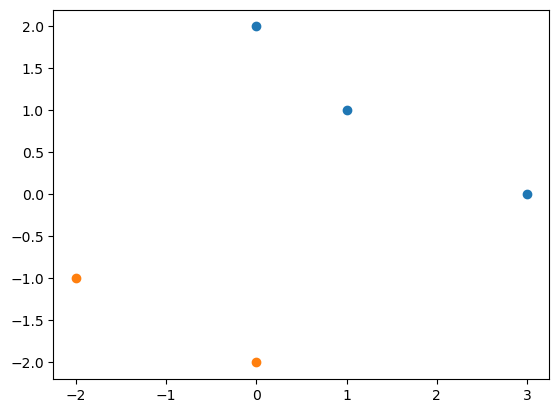

In [3]:
plt.scatter(A_plus[:, 0], A_plus[:, 1])
plt.scatter(A_minus[:, 0], A_minus[:, 1])

In [4]:
A = np.vstack([A_plus, A_minus])
data = np.hstack([A, np.ones((A_plus.shape[0] + A_minus.shape[0], 1))])
y_true = np.hstack([np.ones((A_plus.shape[0])), np.zeros((A_minus.shape[0]))]).reshape(-1, 1)
y_true

array([[1.],
       [1.],
       [1.],
       [0.],
       [0.]])

In [5]:
weight = np.zeros((data.shape[1], 1))

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [7]:
def forward_prop(data, weight):
    y_pred = sigmoid(data @ weight)
    return y_pred

In [8]:
def logloss(y_true, y_pred):
    epsilon = 1e-15  # To prevent log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clipping predictions to avoid log(0)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

def drivative_cost_weight(data, y_true, y_pred):
    m = len(y_true)
    gradient = -1/m * data.T.dot(y_true - y_pred)
    return gradient

In [9]:
def gradient_descent(djdw, weight, learning_rate):
    weight = weight - learning_rate * djdw
    return weight

In [10]:
def predict(data, weight):
    y_pred = forward_prop(data, weight)
    predictions = y_pred > 0.5 
    return predictions.astype('int')

In [11]:
def model(data, y_true, weight, learning_rate):
    y_pred = forward_prop(data, weight)
    cost = logloss(y_true, y_pred)
    djdw = drivative_cost_weight(data, y_true, y_pred)
    weight = gradient_descent(djdw, weight, learning_rate)
    return weight, cost

In [12]:
epochs = 100
learning_rate = 1

for epoch in range(epochs):
    weight, cost = model(data, y_true, weight, learning_rate)
    if epoch % 10 == 0:
        print(f'epoch: {epoch}, cost:{cost}')

epoch: 0, cost:0.6931471805599453
epoch: 10, cost:0.03414383576457349
epoch: 20, cost:0.01788821189307104
epoch: 30, cost:0.012151754773909281
epoch: 40, cost:0.009212001909746272
epoch: 50, cost:0.0074224721782655935
epoch: 60, cost:0.006217759924308032
epoch: 70, cost:0.005351082630803991
epoch: 80, cost:0.004697475102636169
epoch: 90, cost:0.004186852860403447


In [13]:
y_pred = predict(data, weight)
y_pred

array([[1],
       [1],
       [1],
       [0],
       [0]])

In [14]:
x_0 = np.linspace(data[:, 0].min()-1, data[:, 0].max()+1, 100)
x_1 = np.linspace(data[:, 1].min()-1, data[:, 1].max()+1, 100)
grid_0, grid_1 = np.meshgrid(x_0, x_1)
X_grid = np.hstack([grid_0.reshape(-1, 1), grid_1.reshape(-1, 1), np.ones((10000, 1))])

In [15]:
y_grid = predict(X_grid, weight).reshape(grid_0.shape)

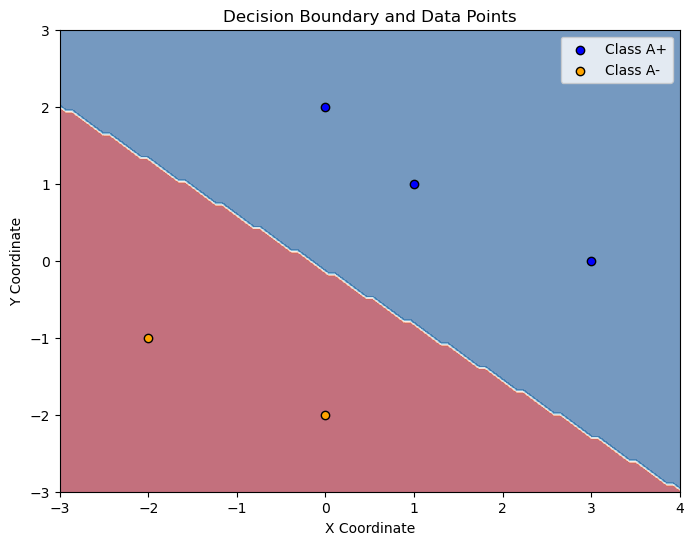

In [16]:
plt.figure(figsize=(8, 6))
plt.contourf(grid_0, grid_1, y_grid, cmap='RdBu', alpha=0.6) 
plt.scatter(A_plus[:, 0], A_plus[:, 1], label='Class A+', color='blue', edgecolor='k')
plt.scatter(A_minus[:, 0], A_minus[:, 1], label='Class A-', color='orange', edgecolor='k')
plt.xlabel('X Coordinate') 
plt.ylabel('Y Coordinate') 
plt.title('Decision Boundary and Data Points') 
plt.legend()
plt.show()

In [17]:
weight

array([[1.96024293],
       [2.74340128],
       [0.35860876]])